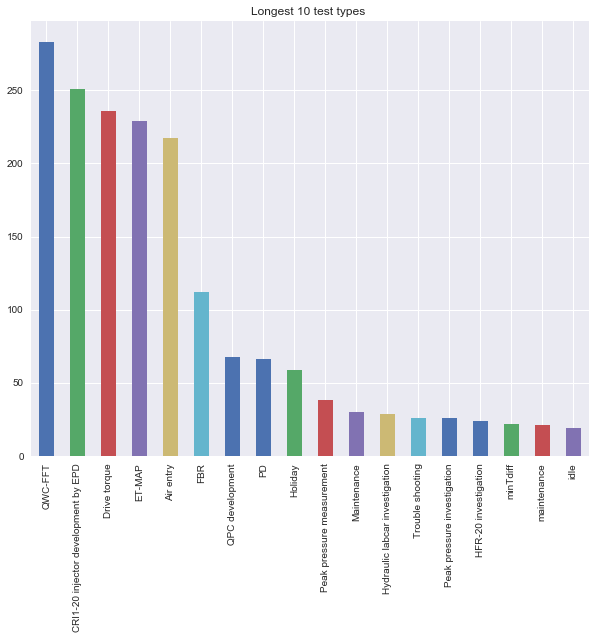

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
df=pd.read_csv("2018.csv").drop(columns=['Unnamed: 9','Week'])
# df=df.replace("^.*ET.{0,1}M[AP|ap].*$",value="ET-MAP",regex=True)
# df=df.replace("^.*FFT.*$",value="QWC-FFT",regex=True)
# df=df.replace("^.*FBR.*$",value="FBR",regex=True)
# df=df.replace("^.*idle.*$",value="idle",regex=True)
# df=df.replace("^.*orque.*$",value="Drive torque",regex=True)
# df=df.replace("^.*Air.*$",value="Air entry",regex=True)
# df=df.replace("^Ma.*ce$",value="Maintenance",regex=True)

df=df.replace({"^.*ET.{0,1}M[AP|ap].*$":"ET-MAP",
              "^.*FFT.*$":"QWC-FFT",
              "^.*FBR.*$":"FBR",
              "^.*idle.*$":"idle",
              "^.*orque.*$":"Drive torque",
              "^.*Air.*$":"Air entry",
              "^Ma.*ce$":"Maintenance"},regex=True)
#Maintenace
df.stack().value_counts().head(18).plot(kind='bar',figsize=(10,8),title="Longest 10 test types ",y="Days count")
#for i in range(1,9):
#    df["TB{}".format(i)].value_counts().head(10).plot(kind='bar',figsize=(8,6),title="Top test type for TB{} om 2018".format(i))
#    plt.show()

In [4]:
import pandas as pd
import numpy as np
def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter


months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

df = pd.DataFrame([
    ['New York','Mar',12714],
    ['New York','Apr',89238],
    ['Atlanta','Jan',8161],
    ['Atlanta','Sep',5885],
  ],columns=['location','month','sales']).set_index(['location','month'])

sort_by_month = sort_pd(key=months.index)

df.iloc[sort_by_month(df.index.get_level_values('month'))]


sales
location month       
Atlanta  Jan     8161
New York Mar    12714
         Apr    89238
Atlanta  Sep     5885

In [55]:
def route(info):
    def deco(fn):
        def new_fn():
            print("Calling :"+fn.__name__)
            fn()
            info and print("info:"+info)
        return new_fn
    return deco

@route("this is a")
def hello():
    print("Hello world.")

@route(None)
def bb():
    print( "I love python.")

bb()

Calling :bb
I love python.


In [44]:
def decorator_factory(enter_message, exit_message):
    # We're going to return this decorator
    def simple_decorator(f):
        def wrapper():
            print(enter_message)
            f()
            print(exit_message)
 
        return wrapper
 
    return simple_decorator
 
@decorator_factory("Start", "End")
def hello():
    print("Hello World")
 
hello()

Start
Hello World
End
